In [1]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Display plots in this notebook, instead of externally. 
from pylab import rcParams
rcParams['figure.figsize']=16,8
%matplotlib inline

# The following are optional dependencies. 
# Feel free to comment these out. 
# Sent2tree uses the sent2tree.py module in this repository. 
from sent2tree import sentenceTree
import ete3
import seaborn

In [2]:
nlp=spacy.load('en_core_web_md')

In [3]:
grail_raw=open('grail.txt').read()
pride_raw=open('pride.txt').read()

In [4]:
grail=nlp(grail_raw)
pride=nlp(pride_raw)

In [5]:
pride[0]

﻿It

In [6]:
pride[:20]

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must

In [7]:
next(pride.sents)

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


In [8]:
prideSents=list(pride.sents)
prideSents[-1]

Darcy, as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.

In [9]:
list(grail.sents)[-1]

CAMERAMAN: Christ!

In [10]:
prideSentenceLengths=[len(sent) for sent in prideSents]
[sent for sent in prideSents if len(sent) ==max(prideSentenceLengths)]

[Every lingering struggle in his favour grew fainter
 and fainter; and in farther justification of Mr. Darcy, she could not
 but allow that Mr. Bingley, when questioned by Jane, had long ago
 asserted his blamelessness in the affair; that proud and repulsive as
 were his manners, she had never, in the whole course of their
 acquaintance--an acquaintance which had latterly brought them much
 together, and given her a sort of intimacy with his ways--seen anything
 that betrayed him to be unprincipled or unjust--anything that spoke him
 of irreligious or immoral habits; that among his own connections he was
 esteemed and valued--that even Wickham had allowed him merit as a
 brother, and that she had often heard him speak so affectionately of his
 sister as to prove him capable of _some_ amiable feeling; that had his
 actions been what Mr. Wickham represented them, so gross a violation of
 everything right could hardly have been concealed from the world; and
 that friendship between a pers

In [11]:
pride[4]

universally

In [12]:
[prop for prop in dir(pride[4]) if not prop.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_'

In [13]:
pride[4].i

4

In [14]:
def locations(needle,haystack):
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack
         if word.text.lower()==needle],bins=50)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b9327456a90>,
      dtype=object)

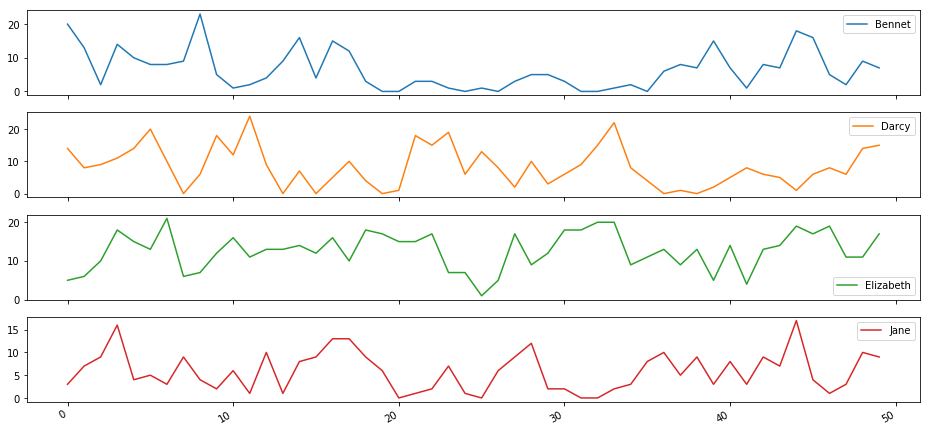

In [15]:
rcParams['figure.figsize']=16,8

pd.DataFrame(
    {name:locations(name.lower(),pride)
     for name in ['Elizabeth','Darcy','Jane','Bennet']}
).plot(subplots=True)

In [16]:
set([w.label_ for w in grail.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [17]:
[ent for ent in grail.ents if ent.label_=='WORK_OF_ART']

[Pure,
 The Tale of Sir,
 The Tale of Sir Galahad,
 The Tale of Sir Launcelot,
 Morning,
 Olfin Bedwere of,
 Camaaaaaargue,
 Black Beast,
 Black Beast]

In [18]:
[ent for ent in grail.ents if ent.label_=='GPE']

[England,
 Bristol,
 England,
 Galahad,
 Galahad,
 WINSTON,
 Britain,
 if--,
 I--,
 Camelot--,
 Hoa,
 Galahad,
 Spring,
 Antioch,
 Antioch,
 Aauuggghhh,
 France,
 Cornwall,
 Iiiiives,
 Thou]

In [19]:
set(list([ent.string.strip() for ent in grail.ents if ent.label_=='ORG']))

{'ARMY',
 'ARMY OF KNIGHTS',
 'ARTHUR',
 'Aaauugh',
 'Aaauugh eats BROTHER MAYNARD',
 'Aggh',
 'Angnor',
 'Arimathea',
 'BEDEVERE',
 'BLACK KNIGHT',
 'Bors',
 'CARTOON',
 'CONCORDE',
 'CRASH',
 'CRONE',
 'Divine Providence',
 'Erm',
 'Excalibur',
 'FRENCH',
 'Grail',
 'HERBERT',
 'Hiyaah',
 'Holy Grail',
 'KNIGHTS',
 'KNIGHTS OF',
 'Knights',
 "Knights Who Say 'Ni'",
 'Knights of Camelot',
 'Knights of Ni',
 'Knights of the Round',
 'Knights of the Round Table',
 'Knights of-- Knights',
 'LAUNCELOT',
 'Launcelot',
 'Ninepence',
 'Oooohoohohooo',
 'PRINCESS LUCKY',
 'PRISONER',
 'ROBIN',
 'SENTRY',
 'SHRUBBER',
 'Supreme',
 'TIM',
 "That's--",
 'The Holy Hand Grenade',
 "The Knights Who Say 'Ni'",
 'Thee',
 "This'll",
 'Umhm',
 'Un',
 'VILLAGER',
 'W--',
 'a--',
 'chu--',
 'l--',
 'n--',
 'the Court of Camelot',
 'the Holy Grail',
 'the Holy Hand Grenade',
 'the Knights of Ni',
 'uh--',
 "we're--"}

In [20]:
set([ent.string for ent in grail.ents if ent.label_ =='NORP'])

{'Aaaaugh',
 'African ',
 'Anarcho',
 'Assyria',
 'Britons',
 'European ',
 'FRENCH ',
 'French',
 'French ',
 'Saxons'}

In [21]:
frenchPeople=[ent for ent in grail.ents if ent.label_ =='NORP' and ent.string.strip()=='French']
[ent.sent for ent in frenchPeople]

[: I'm French!  ,
 The ferocity of the French taunting took him completely by surprise, and Arthur became convinced that a new strategy was required if the quest for the Holy Grail were to be brought to a successful conclusion.  ,
 So, we French fellows outwit you a second time!,
 So, you think you could out-clever us French folk with your silly knees-bent running about advancing behaviour?!  ,
 [silence] French persons!]

In [22]:
tagDict={w.pos:w.pos_ for w in pride}
tagDict

{83: 'ADJ',
 84: 'ADP',
 85: 'ADV',
 88: 'CCONJ',
 89: 'DET',
 90: 'INTJ',
 91: 'NOUN',
 92: 'NUM',
 93: 'PART',
 94: 'PRON',
 95: 'PROPN',
 96: 'PUNCT',
 99: 'VERB',
 100: 'X',
 102: 'SPACE'}

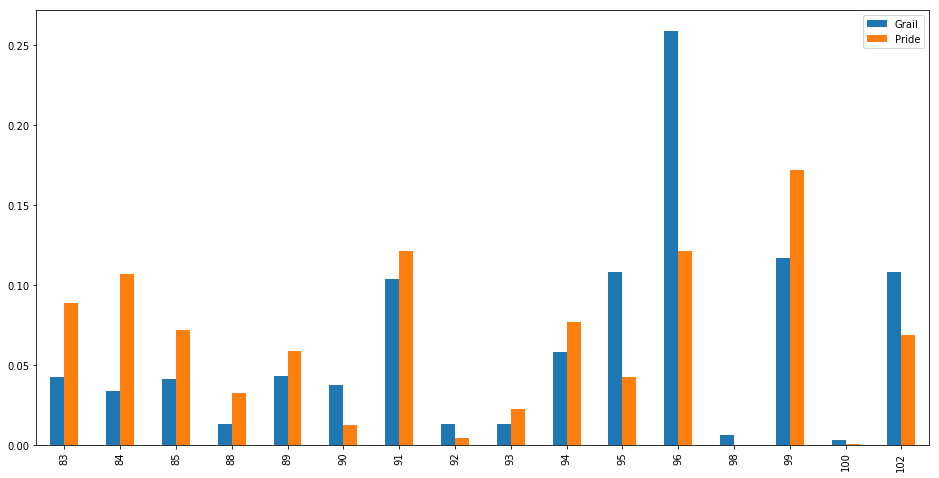

In [23]:
grailPOS = pd.Series(grail.count_by(spacy.attrs.POS))/len(grail)
pridePOS = pd.Series(pride.count_by(spacy.attrs.POS))/len(pride)

rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([grailPOS, pridePOS], index=['Grail', 'Pride'])
# df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

In [24]:
prideAdjs=[w for w in pride if w.pos_=='PRON']
Counter([w.string.strip() for w in prideAdjs]).most_common(10)

[('I', 2065),
 ('she', 1384),
 ('it', 1287),
 ('you', 1145),
 ('he', 1100),
 ('him', 762),
 ('her', 707),
 ('they', 477),
 ('me', 444),
 ('them', 433)]

In [25]:
robinSents=[sent for sent in grail.sents if 'Sir Robin' in sent.string]
robinSents

[The wise Sir Bedevere was the first to join King Arthur's knights, but other illustrious names were soon to follow: Sir Lancelot the Brave; Sir Gallahad the Pure; and Sir Robin the-not-quite-so-brave-as-Sir-Lancelot, who had nearly fought the Dragon of Angnor, who had nearly stood up to the vicious Chicken of Bristol, and who had personally wet himself at the Battle of Badon Hill; and the aptly named Sir Not-appearing-in-this-film.  ,
 Frank
 SCENE 10: [trumpets] 
 NARRATOR: The Tale of Sir Robin.  ,
 Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.,
 Bravely bold Sir Robin, rode forth from Camelot.  ,
 O brave Sir Robin.  ,
 Brave, brave, brave, brave Sir Robin!  ,
 To have his kneecaps split, and his body burned away, And his limbs all hacked and mangled, brave Sir Robin!,
 He is brave Sir Robin, brave Sir Robin, who--
 ROBIN: Shut up!  ,
 Brave Sir Robin ran away.,
 Yes, brave Sir Robin turned about
 ROBIN: I didn't!,
 [singing] Bravest

In [26]:
r2=robinSents[2]
r2

Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.

In [27]:
for word in r2:
    print(word,word.tag_,word.pos_)

Sir NNP PROPN
Robin NNP PROPN
rode VBD VERB
north RB ADV
, , PUNCT
through IN ADP
the DT DET
dark JJ ADJ
forest NN NOUN
of IN ADP
Ewing NNP PROPN
, , PUNCT
accompanied VBN VERB
by IN ADP
his PRP$ ADJ
favorite JJ ADJ
minstrels NNS NOUN
. . PUNCT

  SPACE


In [28]:
[prop for prop in dir(r2) if not prop.startswith('_')]

['as_doc',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'lower_',
 'merge',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'string',
 'subtree',
 'text',
 'text_with_ws',
 'to_array',
 'upper_',
 'vector',
 'vector_norm',
 'vocab']

In [29]:
r2.root

rode

In [30]:
list(r2.root.children)

[Robin, north, ,, through, ,, accompanied, .]

In [31]:
for word in r2:
    print(word,':',str(list(word.children)))

Sir : []
Robin : [Sir]
rode : [Robin, north, ,, through, ,, accompanied, .]
north : []
, : []
through : [forest]
the : []
dark : []
forest : [the, dark, of]
of : [Ewing]
Ewing : []
, : []
accompanied : [by]
by : [minstrels]
his : []
favorite : []
minstrels : [his, favorite]
. : [
]

 : []


In [32]:
# st=sentenceTree(r2)
# t,ts=st.render()
# t.render('%%inline',tree_style=ts)

In [33]:
for sent in robinSents:
    for word in sent:
        if 'Robin' in word.string:
            for child in word.children:
                if child.pos_=='ADJ':
                    print(child)

bold
brave
brave
brave
brave
brave
brave


In [34]:
Counter([w.string.strip() for w in pride.ents if w.label_=='PERSON']).most_common(10)

[('', 1896),
 ('Elizabeth', 616),
 ('Darcy', 375),
 ('Bennet', 299),
 ('Jane', 287),
 ('Bingley', 232),
 ('Collins', 179),
 ('Wickham', 178),
 ('Lydia', 156),
 ('Lizzy', 95)]

In [35]:
def adjectiveDescribingCharacters(text,character):
    sents=[sent for sent in pride.sents if character in sent.string]
    adjectives=[]
    for sent in sents:
        for word in sent:
            if character in word.string:
                for child in word.children:
                    if child.pos_=='ADJ':
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [36]:
adjectiveDescribingCharacters(pride,'Darcy')

[('late', 7),
 ('superior', 1),
 ('poor', 1),
 ('handsome', 1),
 ('her', 1),
 ('little', 1),
 ('disagreeable', 1)]

In [37]:
elizabethSentences=[sent for sent in pride.sents if 'Elizabeth' in sent.string]

In [38]:
elizabethSentences[3]

Mr. Darcy walked off; and Elizabeth
remained with no very cordial feelings toward him.

In [39]:
# sentenceTree(elizabethSentences[3]).render()

In [40]:
def verbsForCharacters(text,character):
    sents=[sent for sent in pride.sents if character in sent.string]
    charWords=[]
    for sent in sents:
        for word in sent:
            if character in word.string:
                charWords.append(word)
    charAdjectives=[]
    for word in charWords:
        for ancestor in word.ancestors:
            if ancestor.pos_.startswith('V'):
                charAdjectives.append(ancestor.lemma_.strip())
    return Counter(charAdjectives).most_common(20)

In [41]:
elizabethVerbs=verbsForCharacters(pride,'Elizabeth')
elizabethVerbs

[('be', 173),
 ('say', 66),
 ('have', 33),
 ('see', 24),
 ('cry', 24),
 ('reply', 22),
 ('feel', 18),
 ('look', 17),
 ('make', 17),
 ('receive', 11),
 ('think', 10),
 ('take', 10),
 ('find', 9),
 ('go', 9),
 ('walk', 8),
 ('listen', 8),
 ('begin', 8),
 ('give', 8),
 ('turn', 7),
 ('smile', 7)]

In [42]:
darcyVerbs=verbsForCharacters(pride,'Darcy')
janeVerbs=verbsForCharacters(pride,'Jane')

In [43]:
janeVerbs

[('be', 123),
 ('say', 21),
 ('see', 18),
 ('have', 17),
 ('think', 12),
 ('look', 9),
 ('feel', 7),
 ('make', 7),
 ('reply', 7),
 ('find', 6),
 ('know', 6),
 ('cry', 6),
 ('write', 6),
 ('seem', 5),
 ('tell', 5),
 ('receive', 5),
 ('hear', 5),
 ('take', 5),
 ('give', 5),
 ('consider', 4)]

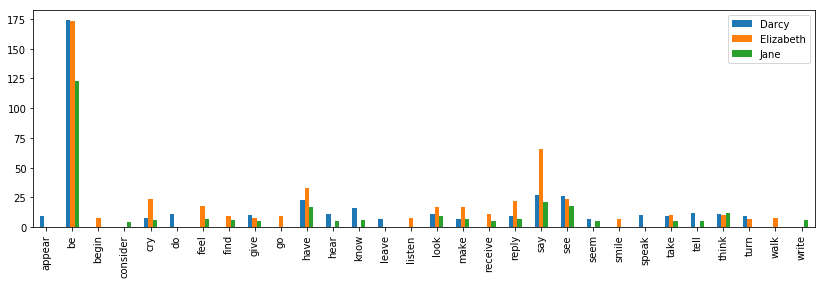

In [44]:
def verbsToMatrix(verbCounts):
    return pd.Series({t[0]:t[1] for t in verbCounts})

verbsDF=pd.DataFrame({'Elizabeth':verbsToMatrix(elizabethVerbs),
                     'Darcy':verbsToMatrix(darcyVerbs),
                     'Jane':verbsToMatrix(janeVerbs)}).fillna(0)
verbsDF.plot(kind='bar',figsize=(14,4))

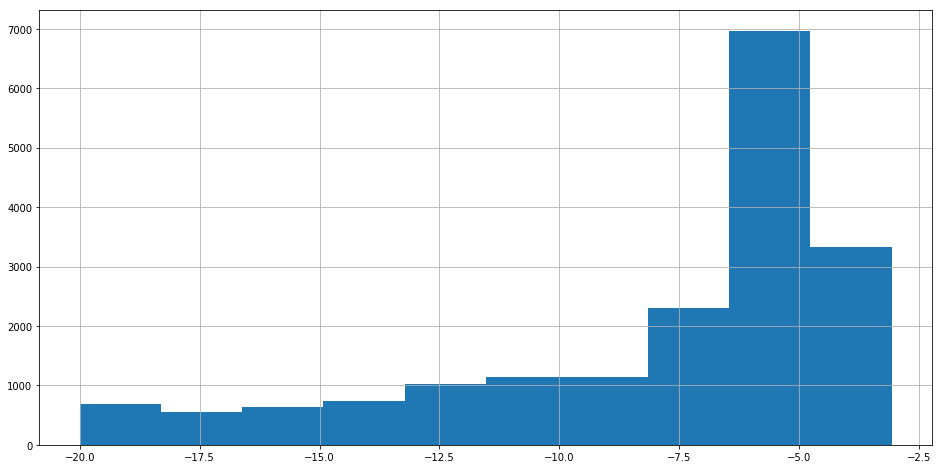

In [45]:
probabilities=[word.prob for word in grail]
pd.Series(probabilities).hist()

In [46]:
list(set([word.string.strip().lower() for word in grail if word.prob < -19]))[:20]

['a--',
 "i'm--",
 'erbert',
 'bedevere',
 'bridgekeeper',
 'yapping',
 'bors',
 'uuggggggh',
 'huyah',
 'aaaaugh',
 'loimbard',
 'auuuuuuuugh',
 'patsy',
 'thppppt',
 'badger--',
 "'cause",
 'j--',
 'aaaugh',
 'launcelot',
 'badon']

In [47]:
Counter([word.string.strip().lower()
        for word in grail
        if word.prob <-19.5]).most_common(20)

[('bedevere', 61),
 ('head', 54),
 ('bridgekeeper', 18),
 ('zoot', 14),
 ('minstrel', 13),
 ('concorde', 12),
 ('rewr', 10),
 ('person', 8),
 ('crone', 7),
 ('aaaaugh', 7),
 ('a--', 5),
 ('twong', 4),
 ('aaaugh', 4),
 ("we're--", 4),
 ('number', 4),
 ('ninepence', 3),
 ('u--', 3),
 ('w--', 3),
 ('hiyya', 3),
 ('um--', 3)]

In [48]:
Counter([word.string.strip().lower()
        for word in pride
        if word.prob <-19.5
        and word.is_alpha
        and word.pos_ != 'PROPN']).most_common(20)

[('rosings', 16),
 ('gentlemanlike', 8),
 ('twelvemonth', 7),
 ('number', 5),
 ('quadrille', 4),
 ('mark', 4),
 ('repine', 4),
 ('discomposure', 3),
 ('regimentals', 3),
 ('suitableness', 3),
 ('overspread', 3),
 ('composedly', 3),
 ('fretfully', 2),
 ('archly', 2),
 ('unaffectedly', 2),
 ('panegyric', 2),
 ('precipitance', 2),
 ('prepossession', 2),
 ('discomposed', 2),
 ('gratulation', 2)]

In [49]:
def ngrams(doc,n):
    doc=[word for word in doc
        if word.is_alpha
        if not word.string.isupper()]
    return list(zip(*[doc[i:] for i in range(n)]))

In [50]:
grailGrams=set(ngrams(grail,3))

In [51]:
for gram in grailGrams:
    if sum([word.prob for word in gram])<-40:
        print(gram)

(donaeis, requiem, Pie)
(dona, eis, requiem)
(Ni, Ni, Ni)
(Aah, boom, pweeng)
(domine, witch, witch)
(wicked, wicked, Zoot)
(taunting, Dappy, Today)
(Launcelot, Launcelot, Launcelot)
(squeak, creak, whispering)
(Ni, Ni, Ni)
(clop, clop, clop)
(hee, hee, Hee)
(Ni, Shh, Shh)
(Iesu, domine, dona)
(clop, clop, clop)
(sawwwww, clunk, crash)
(rewr, rewr, rewr)
(squeak, clllank, What)
(squeak, squeak, clllank)
(Bon, magne, Over)
(mayest, blow, thine)
(Hee, hee, hee)
(ecky, ecky, ecky)
(clop, clop, clop)
(Heh, heh, heeh)
(Thsss, boom, Ayy)
(Umm, clop, clop)
(va, Bon, magne)
(Hurry, Sir, Launcelot)
(Ni, Ni, Ni)
(yes, Saint, Iiiives)
(nnnnniggets, Thpppppt, Thppt)
(clank, twong, Run)
(haw, heh, clack)
(clop, clop, Whoa)
(Iesu, domine, witch)
(squeak, squeak, rrrr)
(No, auuuuuuuugh, Hee)
(ecky, ecky, pikang)
(whispering, un, lapin)
(clop, Halt, horn)
(owli, zhiv, Ni)
(k, nnnnniggets, Thpppppt)
(heh, chanting, dona)
(Saint, Iiiives, Iiiiives)
(Pie, Iesu, domine)
(Quoi, Un, cadeau)
(Ni, Ni, Shh)
(p

In [52]:
coconut, africanSwallow, europeanSwallow, horse = nlp('coconut'), nlp('African Swallow'), nlp('European Swallow'), nlp('horse')

In [53]:
coconut.similarity(horse)

0.1566088129550776

In [54]:
africanSwallow.similarity(horse)

0.3352586340735025

In [55]:
africanSwallow.similarity(europeanSwallow)

0.8596378859289445

In [56]:
prideNouns=[word for word in pride if word.pos_.startswith('N')][:150]

In [57]:
prideNounVecs=[word.vector for word in prideNouns]
prideNounLabels=[word.string.strip() for word in prideNouns]

In [58]:
prideNounVecs[0].shape

(300,)

In [68]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(prideNounVecs)

In [74]:
xs,ys=lsaOut[:0],lsaOut[:1]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(prideNounLabels[i],(xs[i],ys[i]))

In [61]:
tfidf=TfidfVectorizer(input='filename',decode_error='ignore',use_idf=False)

In [62]:
inauguralFilenames=sorted(glob('inaugural/*'))

labels = [filename.split('/')[1] for filename in inauguralFilenames]
labels = [filename.split('.')[0] for filename in labels]

lengths = [len(open(filename, errors='ignore').read())/100 for filename in inauguralFilenames]

parties = 'rrrbbrrrbbbbbrrbbrrbrrrbbrrbr'

In [63]:
tfidfOut = tfidf.fit_transform(inauguralFilenames)

In [64]:
tfidfOut=tfidf.fit_transform(inauguralFilenames)

In [65]:
tfidfOut.shape

(29, 6177)

In [66]:
lsaOut = lsa.fit_transform(tfidfOut.todense())

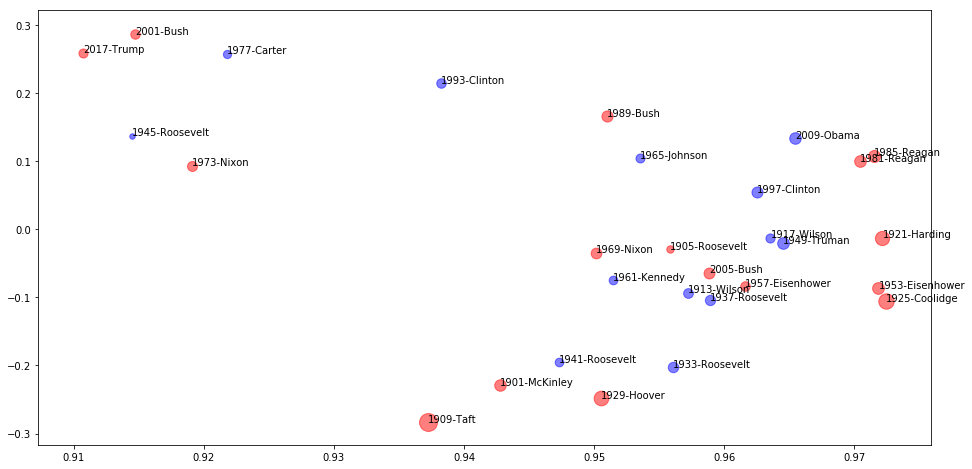

In [67]:
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i], c=parties[i], s=lengths[i], alpha=0.5)
    plt.annotate(labels[i], (xs[i], ys[i]))

In [75]:
inaugural = [nlp(open(doc, errors='ignore').read()) for doc in inauguralFilenames]

In [76]:
sentLengths=[np.mean([len(sent) for sent in doc.sents]) for doc in inaugural]

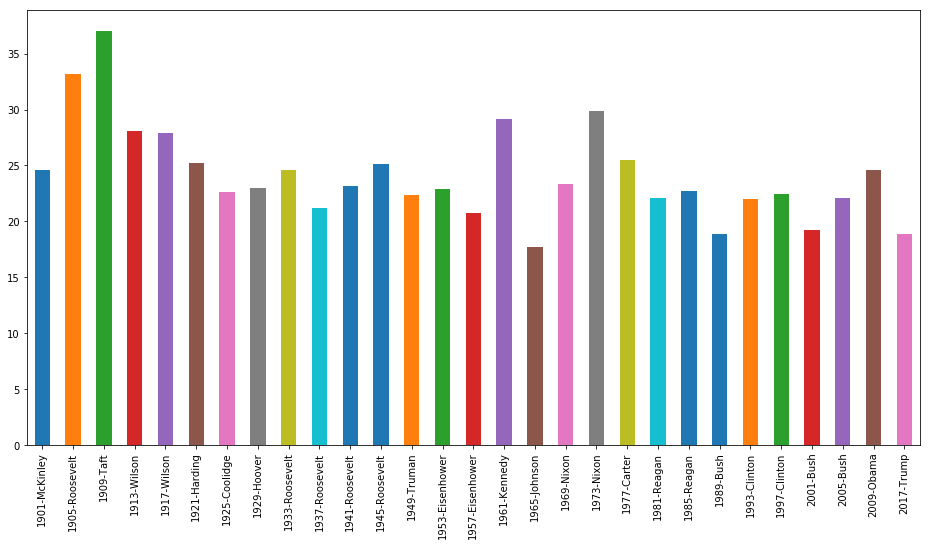

In [77]:
pd.Series(sentLengths,index=labels).plot(kind='bar')

In [79]:
inauguralSeries=[pd.Series(Counter([word.string.strip().lower
                                   for word in doc]))/len(doc)
                                   for doc in inaugural]
seriesDict={label:series for label,series in zip(labels,inauguralSeries)}
inauguralDf=pd.DataFrame(seriesDict).T.fillna(0)

In [80]:
inauguralDf.head()

,<built-in method lower of str object at 0x2b93c27a15a8>,<built-in method lower of str object at 0x2b93c27a1570>,<built-in method lower of str object at 0x2b923476bb90>,<built-in method lower of str object at 0x2b93c258be30>,<built-in method lower of str object at 0x2b923491b030>,<built-in method lower of str object at 0x2b93c27a1618>,<built-in method lower of str object at 0x2b93c27a1688>,<built-in method lower of str object at 0x2b93c258f630>,<built-in method lower of str object at 0x2b93c27a16c0>,<built-in method lower of str object at 0x2b93c27a16f8>,...,<built-in method lower of str object at 0x2b93c3876458>,<built-in method lower of str object at 0x2b93c3876490>,<built-in method lower of str object at 0x2b93c38764c8>,<built-in method lower of str object at 0x2b93c3876500>,<built-in method lower of str object at 0x2b93c3876538>,<built-in method lower of str object at 0x2b93c3876570>,<built-in method lower of str object at 0x2b93c38765a8>,<built-in method lower of str object at 0x2b93c38765e0>,<built-in method lower of str object at 0x2b93c3876618>,<built-in method lower of str object at 0x2b93c3876650>
1901-McKinley,0.000406,0.000406,0.002436,0.000406,0.044255,0.000406,0.000406,0.000406,0.000406,0.000406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1905-Roosevelt,0.000000,0.000000,0.004570,0.000000,0.051188,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909-Taft,0.000000,0.000000,0.001868,0.000000,0.037024,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1913-Wilson,0.000000,0.000000,0.003661,0.000000,0.052824,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917-Wilson,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# inauguralDf[['world','america']].plot(kind='bar')

In [85]:
# americaWorldRatio = inauguralDf['america']/inauguralDf['world']
# americaWorldRatio.plot(kind='bar')

KeyError: 'america'

In [86]:
similarities = [ [doc.similarity(other) for other in inaugural] for doc in inaugural ]
similaritiesDf = pd.DataFrame(similarities, columns=labels, index=labels)

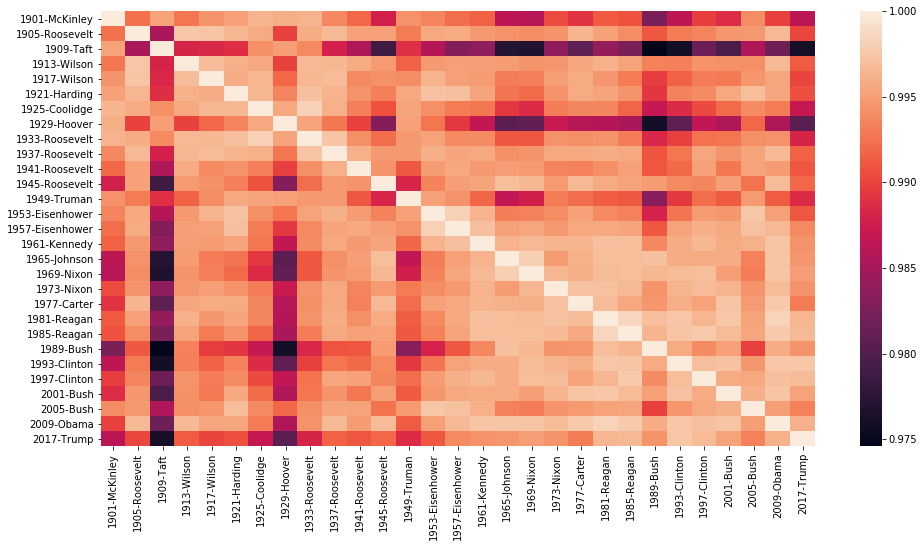

In [87]:
rcParams['figure.figsize'] = 16, 8
seaborn.heatmap(similaritiesDf)